In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import pickle

import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow_addons.optimizers import RectifiedAdam

import sys
sys.path.append('..')
sys.path.append('../colab')
import torch
from sklearn.model_selection import train_test_split
from network_tools import *
from hnet import *
from RHCnet_Custom_dataset import TestDataset_Norm

%pylab inline

c:\Anaconda\envs\tf_keras\lib\site-packages\tensorflow_addons\utils\tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(
c:\Anaconda\envs\tf_keras\lib\site-packages\tensorflow_addons\utils\ensure_tf_install.py:53: UserWarning: Tensorflow Addons supports using Python ops for all Tensorflow versions above or equal to 2.11.0 and strictly below 2.14.0 (nightly versions are not supported). 
 The versions of TensorFlow you are currently using is 2.10.0 and is not supported. 
Some things might work, some things might not.
If you were to encounter a bug, do not file an issue.
If you want to make sure 

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


# Load Dataset

In [2]:
submission = pd.read_csv('./dataset/submission.csv')
adult_file_path = './dataset/ECG_adult_numpy_valid/'
child_file_path = './dataset/ECG_child_numpy_valid/'

In [3]:
submission['gap'] = submission['FILENAME'].apply(lambda x : x[4:9])
child_df = submission[submission['gap'] == 'child']
adult_df = submission[submission['gap'] == 'adult']
child_df.drop('gap', inplace=True, axis= 1)
adult_df.drop('gap', inplace=True, axis= 1)

C:\Users\SNUH벤처\AppData\Local\Temp\ipykernel_15560\4184683789.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  child_df.drop('gap', inplace=True, axis= 1)
C:\Users\SNUH벤처\AppData\Local\Temp\ipykernel_15560\4184683789.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adult_df.drop('gap', inplace=True, axis= 1)


In [4]:
adult_dataset = TestDataset_Norm(adult_file_path,adult_df)
child_dataset = TestDataset_Norm(child_file_path,child_df)
adult_loader = torch.utils.data.DataLoader(adult_dataset, batch_size = len(adult_dataset), shuffle=False)
child_loader = torch.utils.data.DataLoader(child_dataset, batch_size = len(child_dataset), shuffle=False)

In [5]:
adult_batch = next(iter(adult_loader))
child_batch = next(iter(child_loader))
adult_input = adult_batch[0].view(-1,12,5000).transpose(1,2).numpy()
child_input = child_batch[0].view(-1,12,5000).transpose(1,2).numpy()

# Adult

In [6]:
with tf.device('/device:CPU:0'):
    model = tf.keras.models.load_model('./ckp/adult_weight_2')

In [29]:
# adult_train = pd.read_csv('./dataset/ECG_adult_age_train.csv')
# adult_train['seped_AGE'] = adult_train['AGE'].apply(lambda x : int(x//10))
# adult_train.loc[adult_train['seped_AGE'] >= 9,'seped_AGE'] = 8
# adult_train.loc[adult_train['seped_AGE'] <= 1,'seped_AGE'] = 2
# adult_file_path = './dataset/ECG_adult_numpy_train/'
# _, adult_valid_data = train_test_split(adult_train,shuffle=True, random_state=42, test_size=0.1, stratify = adult_train['seped_AGE'])
# adult_valid_data.drop('seped_AGE',axis=1,inplace=True)
# adult_valid_data.reset_index(inplace=True,drop=True)
# adult_valid_dataset = CustomDataset(adult_file_path,adult_valid_data)
# adult_valid_loader = torch.utils.data.DataLoader(adult_valid_dataset, batch_size = len(adult_valid_dataset), shuffle=False)
# valid_batch = next(iter(adult_valid_loader))
# valid_input = valid_batch[0].view(-1,12,5000).transpose(1,2).numpy()
# valid_label = valid_batch[2].numpy()

In [30]:
# with tf.device('/device:CPU:0'):
#     output = model.predict(valid_input)
#     output = output.flatten()
# adult_valid_data['pred'] = output


110/110 [==============================] - 6s 51ms/step


In [31]:
# from sklearn.metrics import mean_absolute_error
# mean_absolute_error(output,valid_label)

8.182684119537887

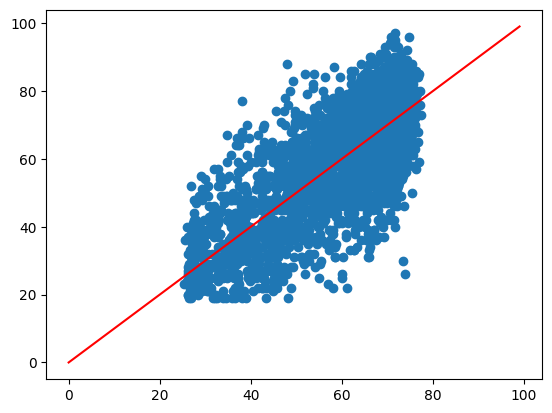

In [19]:
# plt.scatter(output, valid_label)
# plt.plot([i for i in range(0,100)],[i for i in range(0,100)],color='red')

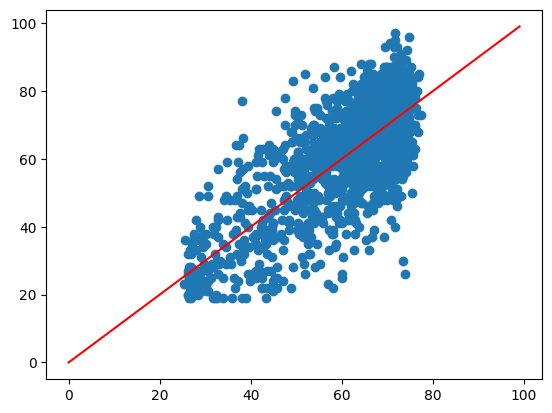

In [20]:
# plt.scatter(adult_valid_data[adult_valid_data['GENDER'] == 'MALE']['pred'],adult_valid_data[adult_valid_data['GENDER'] == 'MALE']['AGE'])
# plt.plot([i for i in range(0,100)],[i for i in range(0,100)],color='red')


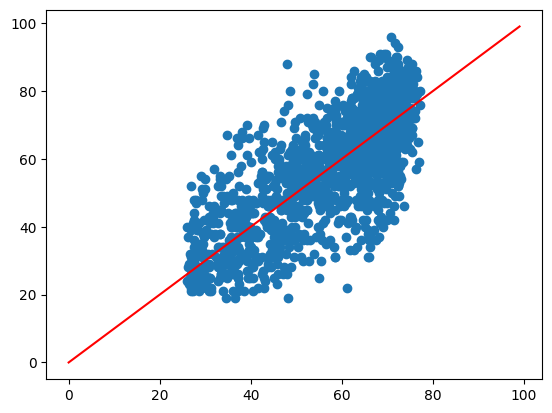

In [21]:
# plt.scatter(adult_valid_data[adult_valid_data['GENDER'] == 'FEMALE']['pred'],adult_valid_data[adult_valid_data['GENDER'] == 'FEMALE']['AGE'])
# plt.plot([i for i in range(0,100)],[i for i in range(0,100)],color='red')


In [7]:
with tf.device('/device:CPU:0'):
    adult_pred = model.predict(adult_input)
    adult_pred = adult_pred.flatten()
adult_df['AGE']= adult_pred

137/137 [==============================] - 7s 52ms/step


C:\Users\SNUH벤처\AppData\Local\Temp\ipykernel_15560\1588515821.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adult_df['AGE']= adult_pred


# child

In [9]:
with tf.device('/device:CPU:0'):
    child_model = tf.keras.models.load_model('./ckp/child_weight')

In [7]:
# child_train = pd.read_csv('./dataset/ECG_child_age_train.csv')
# child_file_path = './dataset/ECG_child_numpy_train/'
# _, child_valid_data = train_test_split(child_train,shuffle=False, random_state=42, test_size=0.1)
# child_valid_data.reset_index(inplace=True,drop=True)
# child_valid_dataset = CustomDataset(child_file_path,child_valid_data)
# valid_child_loader = torch.utils.data.DataLoader(child_valid_dataset, batch_size = len(child_valid_dataset), shuffle=False)
# valid_batch = next(iter(valid_child_loader))
# valid_input = valid_batch[0].view(-1,12,5000).transpose(1,2).numpy()
# valid_label = valid_batch[2].numpy()

In [8]:
# with tf.device('/device:CPU:0'):
#     output = child_model.predict(valid_input)
# child_valid_data['pred'] = output

28/28 [==============================] - 2s 49ms/step


In [9]:
# from sklearn.metrics import mean_absolute_error
# mean_absolute_error(output,valid_label)

0.7663599483321729

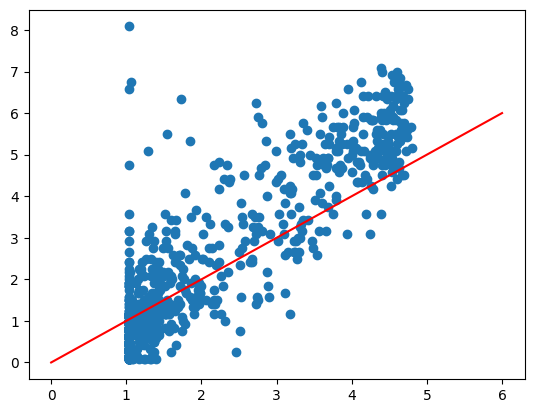

In [6]:
# plt.scatter(output, valid_label)
# plt.plot([i for i in range(0,7)],[i for i in range(0,7)],color='red')

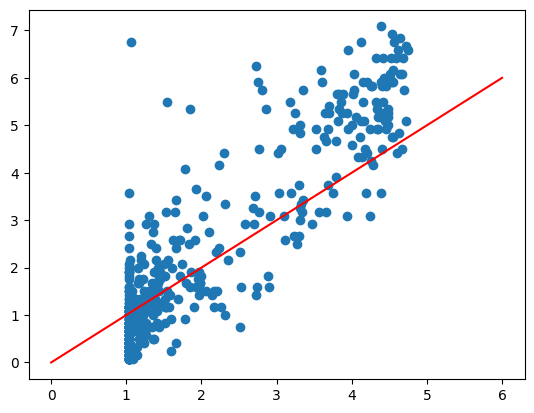

In [8]:
# plt.scatter(child_valid_data[child_valid_data['GENDER'] == 'MALE']['pred'],child_valid_data[child_valid_data['GENDER'] == 'MALE']['AGE'])
# plt.plot([i for i in range(0,7)],[i for i in range(0,7)],color='red')

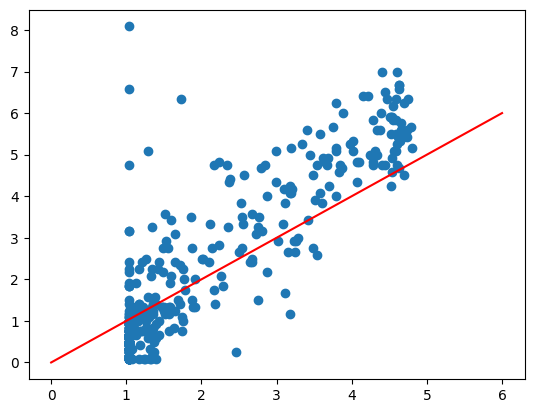

In [9]:
# plt.scatter(child_valid_data[child_valid_data['GENDER'] == 'FEMALE']['pred'],child_valid_data[child_valid_data['GENDER'] == 'FEMALE']['AGE'])
# plt.plot([i for i in range(0,7)],[i for i in range(0,7)],color='red')

In [10]:
with tf.device('/device:CPU:0'):
    child_pred = child_model.predict(child_input)
    child_pred = child_pred.flatten()
child_df['AGE']= child_pred

35/35 [==============================] - 2s 51ms/step


C:\Users\SNUH벤처\AppData\Local\Temp\ipykernel_15560\861809907.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  child_df['AGE']= child_pred


In [14]:
submit = pd.concat([child_df,adult_df])

In [16]:
submit.to_csv('./0921_submit_2.csv',index=False)